# 1.Importamos las librerías 

In [1]:
import pandas as pd
import streamlit as st

# 2. Obtenemos los datos

In [2]:
hospitales = pd.read_csv('./data/Catalogo_de_Hospitales.csv')

In [3]:
gasto_sanidad = pd.read_csv('./data/gasto_sanidad_CCAA.csv', sep=';')

In [4]:
pib = pd.read_csv('./data/pib_per_capita_ccaa.csv', sep=';')

In [10]:
poblacion = pd.read_csv('./data/poblacion_CCAA.csv', sep=';')

In [4]:
mujeres_ccaa = pd.read_csv('./data/mujeres_2020.csv', sep=';')

In [6]:
maquinas = pd.read_csv('./data/Equipo_Médico.csv', sep='\t')

# 3. Gráficas

In [23]:
gasto_sanidad.head()

Comunidad Autónoma  Gasto_sanidad_2021(miles_euros)
0          ANDALUCÍA                         11759292
1             ARAGÓN                          2328735
2           ASTURIAS                          1968939
3          CANTABRIA                           996633
4              CEUTA                             7566

In [25]:
pib.head()

Comunidad Autónoma  PIB_per_capita
0             MADRID           35913
1         PAÍS VASCO           34142
2            NAVARRA           32141
3           CATALUÑA           31119
4             ARAGÓN           28727

In [27]:
pib_vs_gasto = gasto_sanidad.merge(pib, on='Comunidad Autónoma', how='inner')
pib_vs_gasto

x = pib_vs_gasto['Comunidad Autónoma']
y1 = pib_vs_gasto['Gasto_sanidad_2021(miles_euros)'].to_list()
y2 = pib_vs_gasto['PIB_per_capita'].to_list()

import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Bar(
    x=x,
    y=y1,
    name='Gasto en sanidad',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=x,
    y=y1,
    name='PIB por CCAA',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

In [2]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go


df = pd.read_csv('./data/Equipo_Médico.csv', sep='\t')
df['Total'] = df[['TAC', 'RM', 'GAM', 'HEM', 'ASD', 'LIT', 'BCO', 'ALI', 'SPECT', 'PET', 'MAMOS', 'DO', 'DIAL']].sum(axis=1)
df

df.to_csv('maquinas_con_total.csv')

In [11]:
maquinas.head()

Comunidad Autónoma  TAC  RM  GAM  HEM  ASD  LIT  BCO  ALI  SPECT  PET  \
0          ANDALUCÍA  143  77   31   53   44   15    0   37     12    8   
1             ARAGÓN   24  23    1    8    7    3    0    6      4    2   
2           ASTURIAS   19  17    4    4    4    3    0    8      4    3   
3      ILLES BALEARS   23  25    5    9    7    4    0    4      3    2   
4           CANARIAS   38  32   13   14   17    7    0   14     13    3   

   MAMOS  DO  DIAL  
0     91  38   689  
1     23   4   231  
2     19   7   168  
3     23  12   191  
4     30  15   332

In [5]:
mujeres_ccaa

Comunidad Autónoma  numero_mujeres
0              ANDALUCÍA         4293806
1                 ARAGÓN          673335
2               ASTURIAS          532718
3          ILLES BALEARS          587245
4               CANARIAS         1099767
5              CANTABRIA          300346
6        CASTILLA Y LEÓN         1216072
7      CATILLA-LA MANCHA         1021481
8               CATALUÑA         3953515
9   COMUNIDAD VALENCIANA         2565232
10           EXTREMADURA          537699
11               GALICIA         1401666
12                MADRID         3536095
13                MURCIA          754552
14               NAVARRA          333971
15            PAÍS VASCO         1141052
16              LA RIOJA          162079
17                 CEUTA           41660
18               MELILLA           42914

In [11]:
df1 = maquinas[['Comunidad Autónoma', 'MAMOS']]
df1 = df1.merge(mujeres_ccaa, on='Comunidad Autónoma',how='inner')
pop = poblacion[['Comunidad Autónoma', 'Población']]
df1 = df1.merge(pop, on='Comunidad Autónoma', how='inner')
df1

Comunidad Autónoma  MAMOS  numero_mujeres  Población
0              ANDALUCÍA     91         4293806    8464411
1                 ARAGÓN     23          673335    1329391
2               ASTURIAS     19          532718    1018784
3          ILLES BALEARS     23          587245    1171543
4               CANARIAS     30         1099767    2175952
5              CANTABRIA      5          300346     582905
6        CASTILLA Y LEÓN     41         1216072    2394918
7               CATALUÑA    105         3953515    7780479
8   COMUNIDAD VALENCIANA     57         2565232    5057353
9            EXTREMADURA     19          537699    1063987
10               GALICIA     35         1401666    2701819
11                MADRID     96         3536095    6779888
12                MURCIA     21          754552    1511251
13               NAVARRA      8          333971     661197
14            PAÍS VASCO     30         1141052    2220504
15              LA RIOJA      4          162079     319914
16                 CEUTA      1           41660      84202
17               MELILLA      1           42914      87076

/home/gonzalo/Documentos/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/gonzalo/Documentos/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


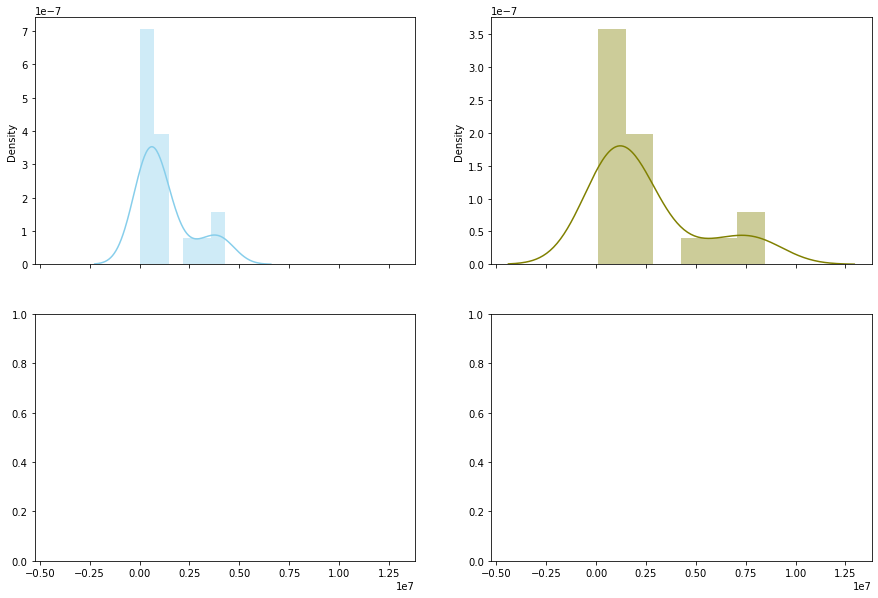

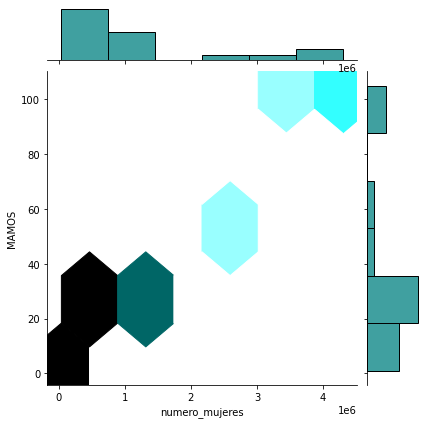

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

f, axes = plt.subplots(2, 2, figsize=(15,10), sharex=True)
sns.distplot(df1['numero_mujeres'] , color="skyblue", ax=axes[0, 0])
sns.distplot(df1['Población'] , color="olive", ax=axes[0, 1]);

sns.jointplot(x = df1['numero_mujeres'], y = df1['MAMOS'], kind='hex' , color="teal")